<a href="https://colab.research.google.com/github/ConorCJ96/Titanic_Train/blob/main/Assignment_2_MSDS422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install mglearn

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import matplotlib.cbook as cbook
import seaborn as sns  
import re 
import scipy
import os 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, r2_score  
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, cross_val_score, cross_val_predict
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from math import sqrt 
import sklearn.linear_model 
from pandas.plotting import scatter_matrix

%matplotlib inline

Dictionary:
* mv : Median value of homes in thousands of 1970 dollars
* nox : Air pollution (nitrogen oxide concentration)
* crim : crime rate
* zn : Percent of land zoned for lots
* indus : Percent of business that is industrial or nonretail
* chas : On the Charles River (1) or not (0)
* rooms : Average number of rooms per home
* age : Percentage of homes built before 1940
* dis : Weighted distance to employment centers
* rad : Accessibility to radial highways
* tax : Tax rate
* ptratio : Pupil/teacher ratio in public schools
* lstat : Percentage of population of lower socio-economic status


In [17]:
RANDOM_SEED = 1

SET_FIT_INTERCEPT = True

In [18]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
#S3 Establish working directory
os.getcwd()
%cd /content/gdrive/My Drive/MSDS 422
!pwd
!ls

/content/gdrive/My Drive/MSDS 422
/content/gdrive/My Drive/MSDS 422
 Analytics_App_Course_Interest.png
 Assignment_2_MSDS422.ipynb
 boston.csv
'Course Interest Pair.png'
 Foundations_DE_Course_Interest.png
'Hisogram of Software Preferences.png'
 mspa-survey-data.csv
 mv_log.png
 mv.png
'New Course Interest.png'
'New Courses Corr Heatmap.png'
'Number of Respondents by Courses Taken by Programming Language.png'
 plot-corr-map.pdf
 pp_BSH_Options.pdf
'Professional Need by Courses Completed Category Java.png'
'Professional Need by Courses Completed Category JS.png'
'Professional Need by Courses Completed Category Pair.png'
'Professional Need by Courses Completed Category Python.png'
'Professional Need by Courses Completed Category R.png'
'Professional Need by Courses Completed Category SAS.png'
 Professional_Python_Log_Box.png
 Professional_Python_Log.png
 Professional_Python_Log_Trimmed.png
 Professional_Python_Min_Max_Box.png
 Professional_Python_Min_Max.png
 Professional_Python_Power.pn

In [20]:
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/MSDS 422"

boston = pd.read_csv(work_dir+'/boston.csv')

Working Directory
/content/gdrive/My Drive/MSDS 422


In [21]:
print('\nboston DataFrame (first and last five rows):')
print(boston.head())
print(boston.tail())

print('\nGeneral description of the boston_input DataFrame:')
print(boston.info())

boston = boston.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston)

print('\nDescriptive statistics of the boston DataFrame:')
print(boston)

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

print('\nData dimensions:', prelim_model_data.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

print(scaler.mean_)
print(scaler.scale_)

model_data = scaler.fit_transform(prelim_model_data)

print('\nDimensions for model_data:', model_data.shape)


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

```
# This is formatted as code
```

# Data distribution before and after scaling is implemented

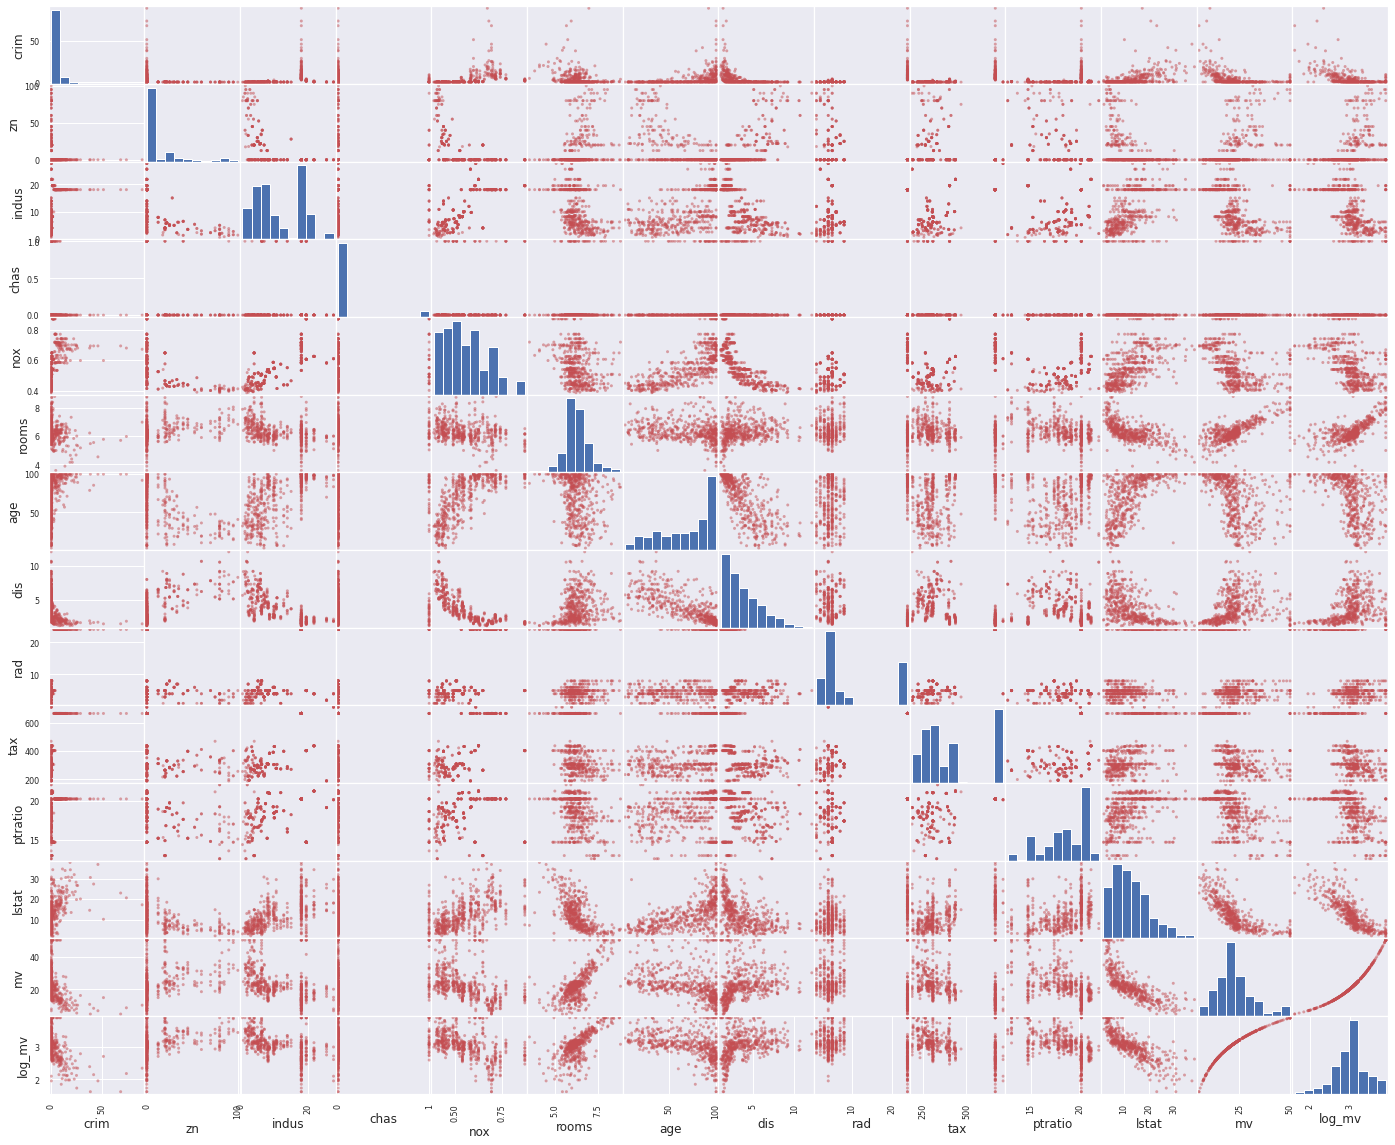

In [185]:
scatter_matrix(boston, figsize=(24, 20),color='r')
plt.show('Scatter Plot Matrix of boston data set')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


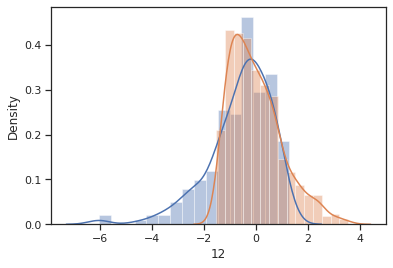

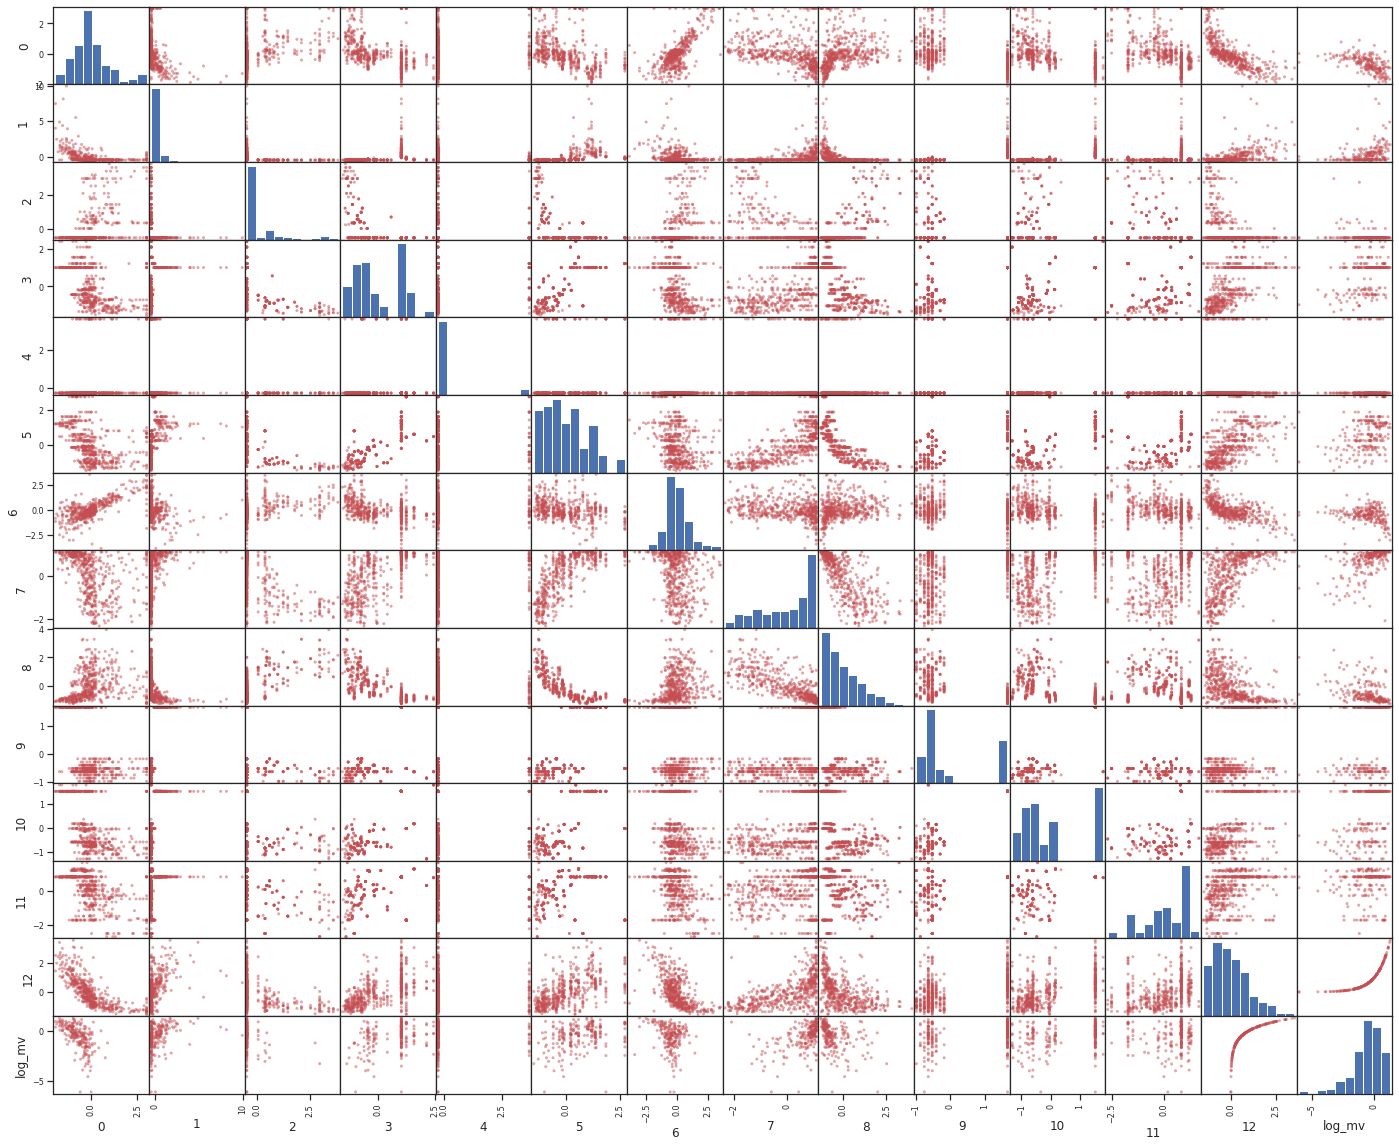

In [177]:
model_data1['log_mv']=np.log(model_data1[12])
logmvplot2=sns.distplot(model_data1['log_mv']);
logmvplot_2 = logmvplot2.get_figure()
logmvplot_2.savefig("logmvplot2.png")

mvplt2=sns.distplot(model_data1[12])
mvplot_2 = mvplt2.get_figure()
mvplot_2.savefig("mvplot_2.png")

scatter_matrix(model_data1, figsize=(24, 20),color='r')
plt.show('Scatter Plot Matrix of boston data set')

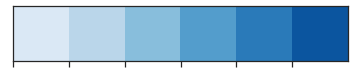

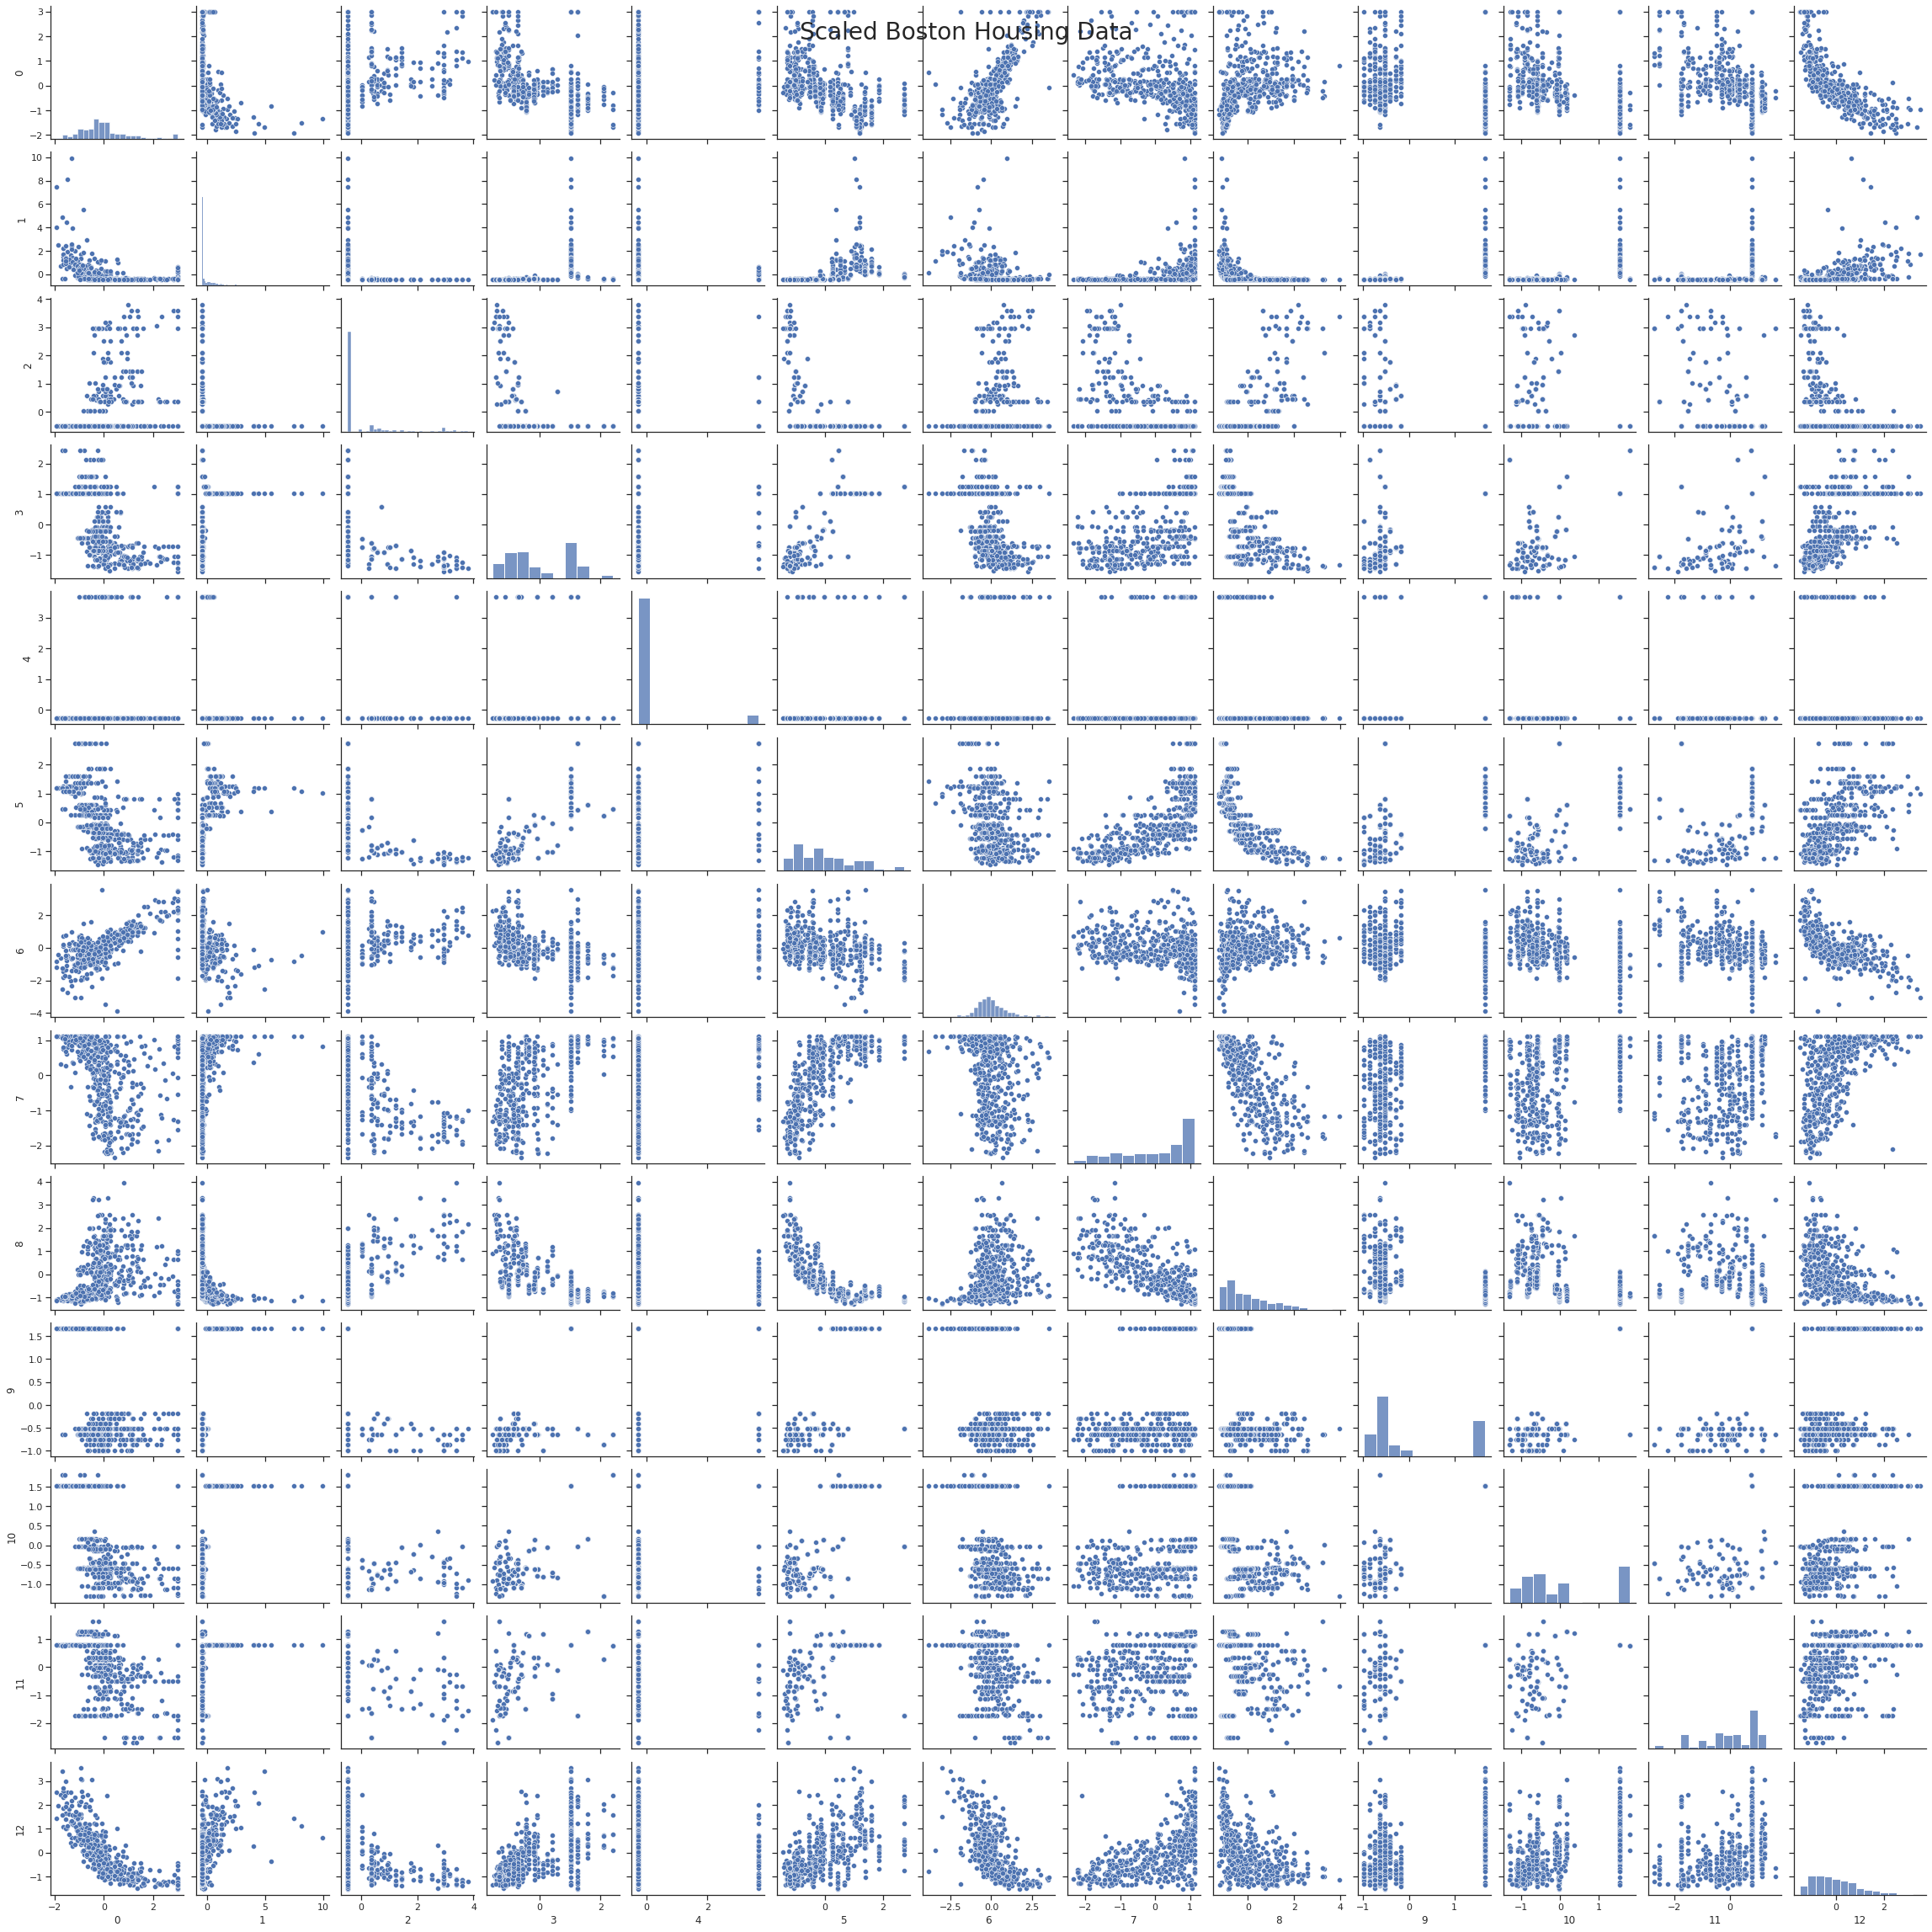

In [178]:
sns.set(style="ticks")
sns.palplot(sns.color_palette("Blues"))
def sp_plot(scatp_df):
    sns.pairplot(scatp_df)
    file_title = 'Boston'
    plt.suptitle('Scaled Boston Housing Data', size = 28);
    plt.savefig('ScaledDataBoston.pdf', 
                    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='r', 
                    orientation='landscape', papertype=None, format=None, 
                    #transparent=True, pad_inches=.25, frameon=None
                    transparent=True, pad_inches=.25)

y_col=0
model_data1 = pd.DataFrame.from_records(model_data)
sp_plot(model_data1)

We can see the difference between the boston data set before and after we scale the data. By doing so we have reduced the range amongst our variables and this will allow us to better train our machine learning algorithms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6172bf6978>,
      dtype=object)

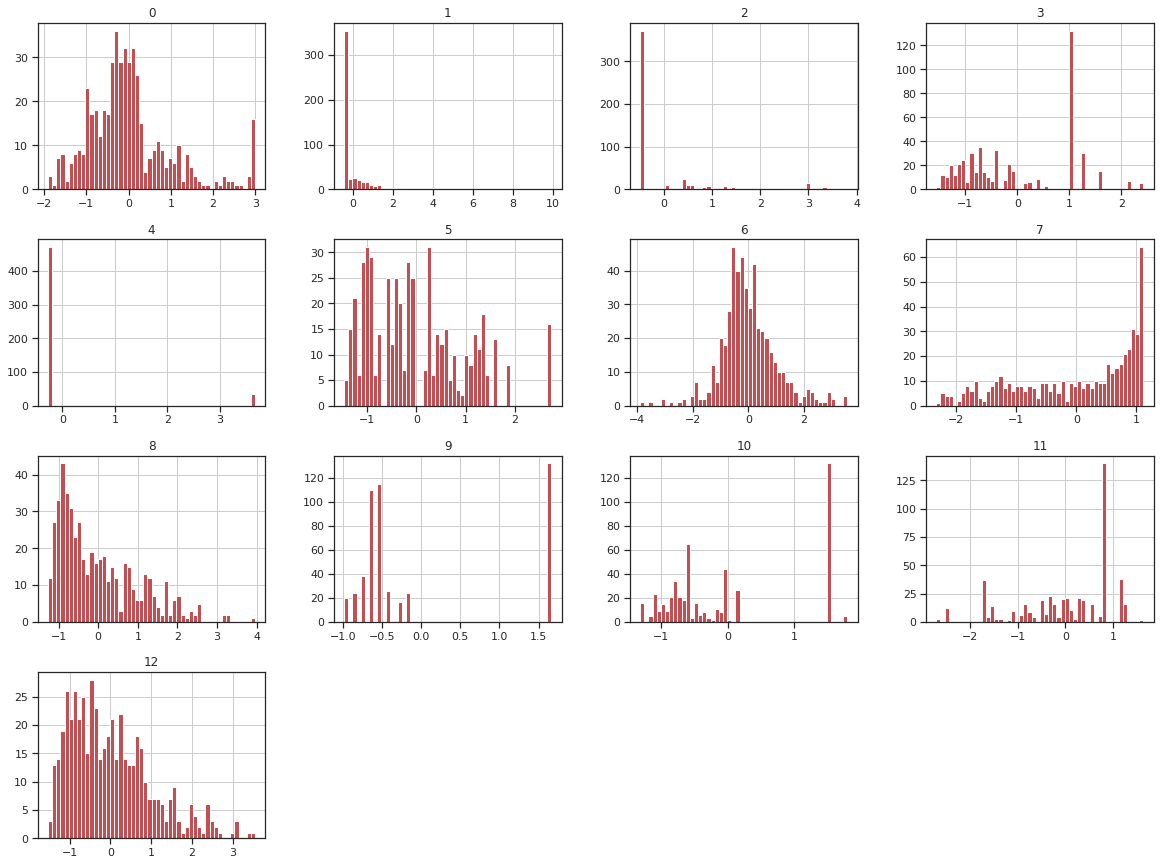

In [179]:
model_data1.hist(bins=50, figsize=(20,15),color='r')

After scaling my data above, we can now see how the ranges have been greatly reduced, thus offering some confidence for our next steps when we begin our analysis.

In [23]:
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


Dictionary:
* crim : 0
* zn : 1
* indus : 2
* chas : 3
* nox : 4
* rooms : 5
* age : 6
* dis : 7
* rad : 8
* tax : 9
* ptratio : 10
* lstat : 11
* mv : 12

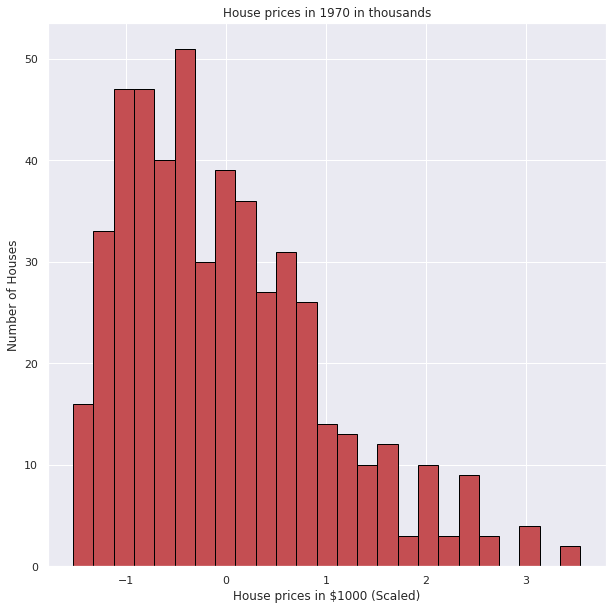

Here I have included our scaled version of our mv


In [180]:
sns.set(rc={'figure.figsize':(10,10)})
plt.hist(model_data1[12], bins=25, color='r',edgecolor='black')
plt.xlabel("House prices in $1000 (Scaled)")
plt.ylabel("Number of Houses")
plt.title("House prices in 1970 in thousands")
plt.show()
print("Here I have included our scaled version of our mv")

# Correlation Matrix Observations before and after Scaling

The next thing we want to do is determine what variables we want to use to study mv. To do this, we must assess for colinearity to make sure we do not use independent variables that are highly correlated. As we can see below, dis and age have a high negative correlation, so we should look to use only one of those instead of both.

---------------------------------------------------------------------------------------------------------------------
I have chose to use for independent variables here: ptratio, rooms, nox, and dis. The reason for this is upon reviewing the heat map below, there is no correlation stronger than .35 and -.36 among any of them. This leads me to believe they are all fairly independent of eachother.


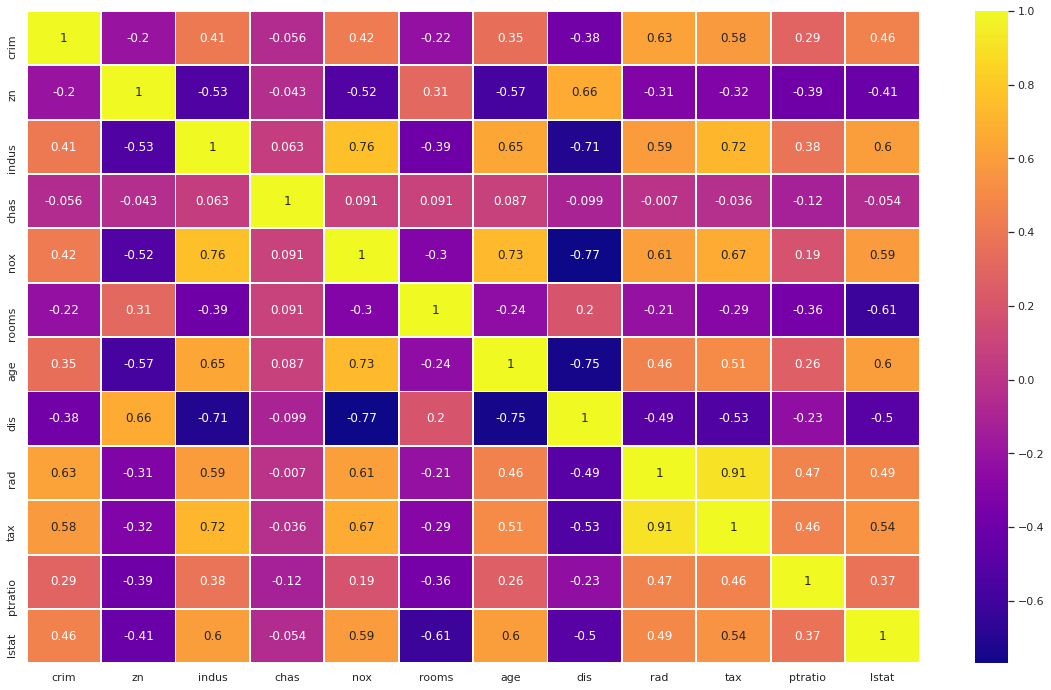

In [87]:
boston_non_mv_columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

bos_corr = boston[boston_non_mv_columns]
bos_corr_matrix = bos_corr.corr().round(3)
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data=bos_corr_matrix, annot=True, cmap='plasma', linewidths=1)

print("The next thing we want to do is determine what variables we want to use to study mv. To do this, we must assess for colinearity to make sure we do not use independent variables that are highly correlated. As we can see below, dis and age have a high negative correlation, so we should look to use only one of those instead of both.")
print("\n---------------------------------------------------------------------------------------------------------------------")
print("I have chose to use for independent variables here: ptratio, rooms, nox, and dis. The reason for this is upon reviewing the heat map below, there is no correlation stronger than .35 and -.36 among any of them. This leads me to believe they are all fairly independent of eachother.")

Here we see how the correlation matrix has not changed because of our scaling, which shows nothing strange occured to effect our results.


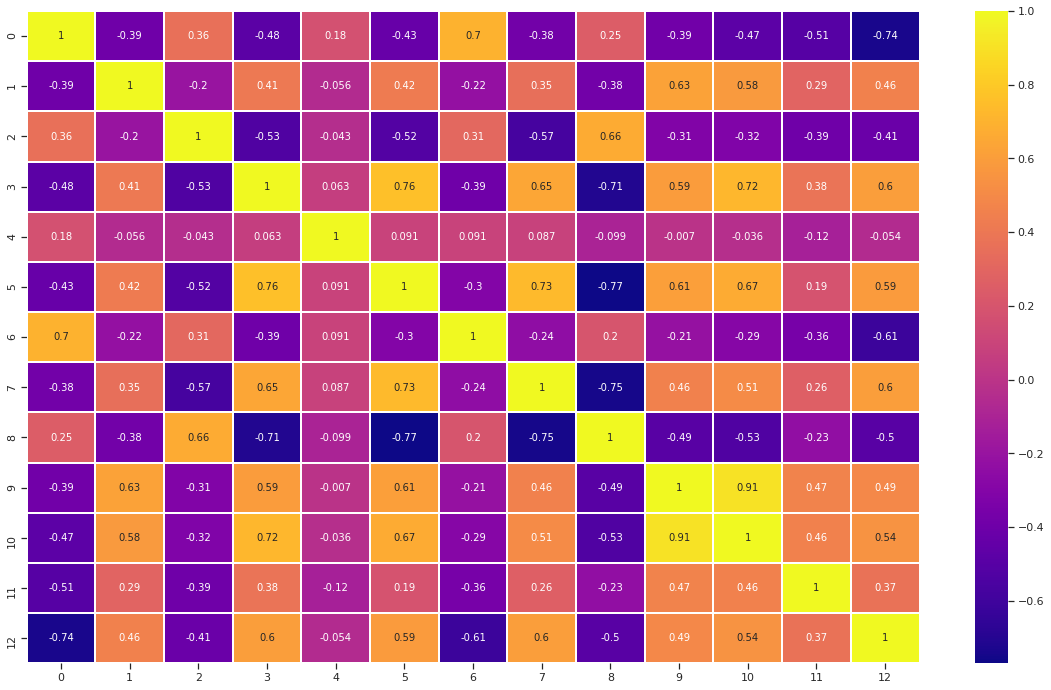

In [168]:
bos_corr_matrix1 = model_data1.corr().round(3)
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(data=bos_corr_matrix1, annot=True, cmap='plasma', linewidths=1)
print("Here we see how the correlation matrix has not changed because of our scaling, which shows nothing strange occured to effect our results.")

From the charts we see here, it appears that rooms and distance have a positive linear correlation between 


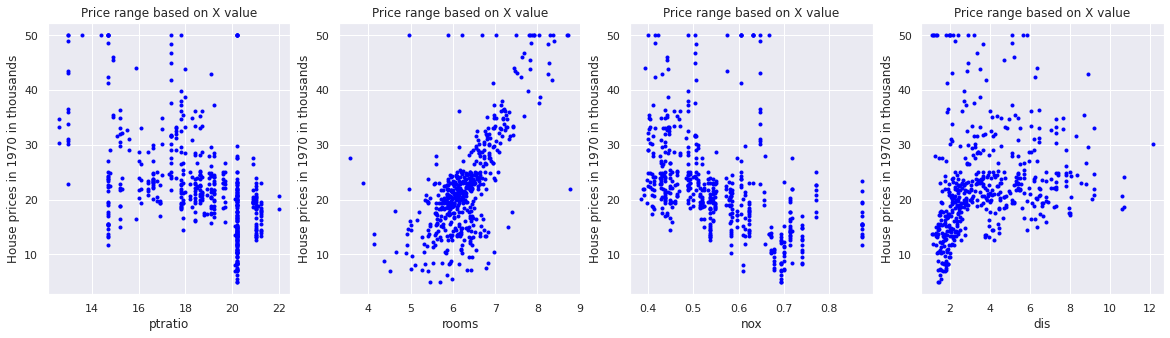

In [181]:
plt.figure(figsize=(20, 5))

variables = ['ptratio', 'rooms','nox','dis',]
predict_mv = boston['mv']

for i, col in enumerate(variables):
    plt.subplot(1, len(variables) , i+1)
    x = boston[col]
    y = predict_mv
    plt.scatter(x, y,marker='.',color='blue')
    plt.title("Price range based on X value")
    plt.xlabel(col)
    plt.ylabel('House prices in 1970 in thousands')
    
print("From the charts we see here, it appears that rooms and distance have a positive linear correlation between ")

In [142]:
print(model_data1.describe())

                 0             1   ...            11            12
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean  -3.962575e-16 -8.688702e-17  ...  4.493551e-16 -1.595123e-16
std    1.000990e+00  1.000990e+00  ...  1.000990e+00  1.000990e+00
min   -1.910898e+00 -4.197819e-01  ... -2.707379e+00 -1.531127e+00
25%   -5.999994e-01 -4.109696e-01  ... -4.880391e-01 -7.994200e-01
50%   -1.448642e-01 -3.906665e-01  ...  2.748590e-01 -1.812536e-01
75%    2.693906e-01  7.396560e-03  ...  8.065758e-01  6.030188e-01
max    2.994751e+00  9.933931e+00  ...  1.638828e+00  3.548771e+00

[8 rows x 13 columns]




```
# This is formatted as code
```

# Below you will see my Linear Regression Testing for my Scaled Data with RMSE and r^2 scores


In [182]:
boston2 = model_data1.drop(12,axis=1)
price = model_data1[12]

x_train2, x_test2, y_train2, y_test2 = train_test_split(boston2, price, test_size = 0.2, random_state=5)

linreg2 = LinearRegression()
linreg2.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
y_train_pre_1 = linreg2.predict(x_train2)
rmse = (np.sqrt(mean_squared_error(y_train2, y_train_pre_1)))
r2 = round(linreg2.score(x_train2, y_train2),2)

print("Training set")
print('RMSE : {}'.format(rmse.round(5)))
print('R^2 : {}'.format(r2))

Training set
RMSE : 0.51426
R^2 : 0.73


In [184]:
y_test_pre_2 = linreg2.predict(x_test2)
rmse = (np.sqrt(mean_squared_error(y_test2, y_test_pre_2)))
r2 = round(linreg2.score(x_test2, y_test2),2)

print("Test Set")
print("RMSE : {}".format(rmse.round(5)))
print("R^2 : {}".format(r2))

Test Set
RMSE : 0.58965
R^2 : 0.68


In [117]:
cv_results1 = cross_val_score(linreg2, boston2, price, cv = 5)
cv_results1
print("Accuracy: %0.3f (+/- %0.3f)" % (cv_results1.mean(), cv_results1.std() * 2))

Accuracy: 0.529 (+/- 0.304)


### What we can see here is that our accuracy has a mean accuracy score of 53% with a 95% confidence interval of +/- .304, which is definitely lower than what we would like. We will now take another step to see if we can improve our results.

In [124]:
ridge = Ridge(alpha = 1, normalize = True)
ridge.fit(x_train2,y_train2)
ridge_pred = ridge.predict(x_test2)
display(ridge.score(x_test2, y_test2).round(5))
print("After using ridge, we saw a significant increase in performance for our predictions")

0.641

After using ridge, we saw a significant increase in performance for our predictions


In [126]:
lasso = Lasso(alpha = .1, normalize = True)
lasso.fit(x_train2,y_train2)
lasso_pred = lasso.predict(x_test2)
display(lasso.score(x_test2, y_test2).round(5))
print("After using lasso, we actually saw a steep decrease in performance for our predictions, so we will likely avoid using this for now")

-0.01343

After using lasso, we actually saw a steep decrease in performance for our predictions, so we will likely avoid using this for now


In [127]:
# specify the k-fold cross-validation design for MV
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(model_data1)))
cv_results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
from sklearn.model_selection import KFold

X = model_data1
N_FOLDS = KFold(n_splits=10)
for train, test in N_FOLDS.split(model_data1):
    print("%s %s" % (train, test))

[ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 29

In [135]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
pipeline1 = make_pipeline(StandardScaler(),
                        PCA(n_components=12),
                        svm.SVR(kernel='linear', C=1))
pipeline1.fit(x_train2, y_train2)
y_pred = pipeline1.predict(x_test2)
print('Test Accuracy: %.3f' % pipeline1.score(x_test2, y_test2))

Test Accuracy: 0.682


# Here I decided to perform a Rdige Regression on my Testing and Training Tests to see how my results might change.

In [186]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [('scalar', StandardScaler()),('poly', PolynomialFeatures(degree=2)),('model', Ridge(alpha=3.8, fit_intercept=True))]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train2, y_train2)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cvridge = cross_val_score(estimator = ridge_pipe, X = x_train2, y = y_train2.ravel(), cv = 10)

# Predicting R2 Score the Test set results
pred_ridge= ridge_pipe.predict(x_train2)
r2_ridge_score = r2_score(y_train, pred_ridge)

# Predicting R2 Score the Test set results
pred_ridgetest = ridge_pipe.predict(x_test2)
r2_ridgetest = r2_score(y_test2, pred_ridgetest)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, pred_ridgetest)))
print('CV: ', cvridge.mean())
print('r^2 (train): ', r2_ridge_score)
print('r^2 (test): ', r2_ridgetest)
print("RMSE: ", rmse_ridge)

CV:  0.7502859052716595
r^2 (train):  -6.184920584535122
r^2 (test):  0.766663247959314
RMSE:  24.017439586079174


We can see here that my Ridge cross-validation score was fairly high at .75. I believe a Ridge analysis is better in some cases to when there are instances of higher colinearity amongst our variables. If we refer to the correlation matrixes above, we can see multiple points og higher correlation.

# Analysis Write-Up

For a real estate management company, it is important that you invest in the right places. This means taking into account all of the factors that can sway the value of a home. The dataset we are using today provides us with some average home values in the Boston area from the 1970's. Some of the features included (outside of average value) were crime, zone, indus, chas, nox, rooms, age, distance, rad, tax, ptratio, and lstat (you can find the definitions for each of these in the dictionary at the beginning of this notebook). 

For my analysis I decided to perform a linear regression test and a ridge regression test. But before I was able to perform these, I need to take a number of steps to make sure my data was properly prepared. The first step was to drop the neighborhood column from my data, since it was a categorical variable and I will be using only numerical. The second step involved scaling my data to ensure that my data work correctly with normalization. The reason for this is that machine learning algorithms can sometimes struggle with working with variables when values range widely (such as age and tax in our data). As a result, we must normalize it to ensure proportional performance in comparison to other smaller ranging variables. 

My next step was to create a couple of visual displays of my original data set (titled boston) and my scaled data set (model_data1). What I wanted to see is many of the skewed ranges I saw were more normally distributed according to the smaller scale they were meant to be condensed to. What I saw is my data did just that, and because of this I was comfortable with moving forward with my study. What I did next was created a heat map display the correlations between all of my independent variables to make sure I didn't see many instances of high colinearity. There were a few instances where this did occur, and as a result I was able to determine that a lasso regression would not be a reasonable study, as this type of regression analysis tends to perform poorly when colinearity is present.

First I decided to perform a linear regression test on my model data to see how it scored. To do this, I dropped the home value column (12) and used the remaining independent varibales as my X axis values, with price then being placed for Y. After doing this, I set up an 80% to 20% split for my training and test sets. The results I saw were good, but certainly left much to be desired, they results were :

Training set
RMSE : 0.51426
R^2 : 0.73

Test Set
RMSE : 0.58965
R^2 : 0.68

Now, scoring nearly 70% accuracy for predicting home values might seem like a good result, but we would much prefer to see some improvement. As a result, I decided to take another step and perform a Ridge regression analysis. The reason for this is because unlike Lasso, Ridge analysis is meant to be used when there are instances of colinearity amongst some of our independent variables. What ridge does is it helps to reduce the variances from our observed values which helps to reduce standard errors. After performing this test on my data, these were my results.

CV:  0.7502859052716595
R2_score (train):  -6.184920584535122
R2_score (test):  0.766663247959314
RMSE:  24.017439586079174

With a cross validation ridge score of nearly 75%, we definitely saw some improvelment within our testing. However, it is clear a few more tests could be performed to clean up our data prior to these tests.

In my opinion, I think it would be most beneficial for management to use a ridge regression analysis. Given the fact there are clearly instances of high colinearity amongst the independent variables, it would make the most sense for ridge as it would help to improve results by minimizing variances and reducing standard errors.





